In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
df = pd.read_csv('/kaggle/input/fake-news/FakeNewsNet.csv')

In [50]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [51]:
df.describe()

,tweet_num,real
count,23196.000000,23196.000000
mean,88.956803,0.751897
std,488.694592,0.431921
min,0.000000,0.000000
25%,11.000000,1.000000
50%,37.000000,1.000000
75%,65.000000,1.000000
max,29060.000000,1.000000


In [52]:
df.sample(5)

,title,news_url,source_domain,tweet_num,real
8243,"Watch Super Bowl LII: Patriots vs Eagles, Stre...",www.nbcsports.com/super-bowl,www.nbcsports.com,195,0
17008,Nicole Kidman and Keith Urban celebrate 12th w...,www.dailymail.co.uk/tvshowbiz/article-5885707/...,www.dailymail.co.uk,9,0
18203,Japanese Skin Care,https://www.sephora.com/japanese-skin-care,www.sephora.com,37,1
9401,Kim Kardashian and Kanye West's baby son Saint...,https://www.dailymail.co.uk/tvshowbiz/article-...,www.dailymail.co.uk,24,1
8635,Awards News,https://costumedesignersguild.com/articles-vid...,costumedesignersguild.com,28,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


In [54]:
df.duplicated().sum()

np.int64(137)

In [55]:
df = df.drop_duplicates()

In [56]:
df = df.drop(['news_url'],axis=1)

In [57]:
# sns.countplot(x=df['source_domain'])
# plt.show()

In [58]:
df = df.drop(['source_domain'],axis=1)

In [59]:
df = df.drop(['tweet_num'], axis=1)

In [60]:
# sns.scatterplot(df['tweet_num'])
# plt.show()

In [61]:
df['real'].unique()

array([1, 0])

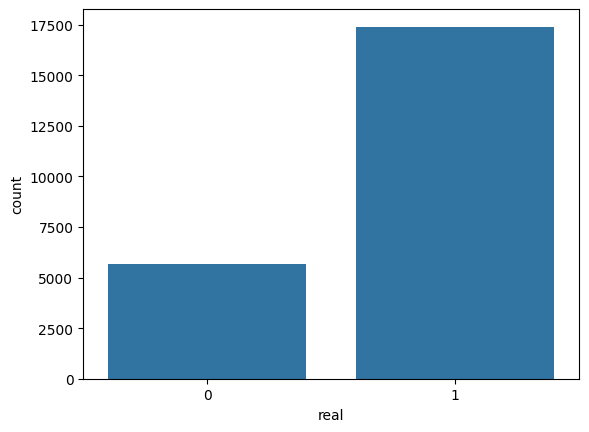

In [62]:
sns.countplot(x=df['real'])
plt.show()

In [63]:
df['title'][:6]

0    Kandi Burruss Explodes Over Rape Accusation on...
1    People's Choice Awards 2018: The best red carp...
2    Sophia Bush Sends Sweet Birthday Message to 'O...
3    Colombian singer Maluma sparks rumours of inap...
4    Gossip Girl 10 Years Later: How Upper East Sid...
5    Gwen Stefani Got Dumped by Blake Shelton Over ...
Name: title, dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23059 entries, 0 to 23195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23059 non-null  object
 1   real    23059 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 540.4+ KB


In [65]:
df['text'] = df['title']
df['category'] = df['real']

In [66]:
df = df.drop(['title','real'], axis=1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23059 entries, 0 to 23195
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      23059 non-null  object
 1   category  23059 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 540.4+ KB


In [68]:
df.isna().sum()

text        0
category    0
dtype: int64

In [69]:
df.isnull().sum()

text        0
category    0
dtype: int64

In [70]:
df = pd.DataFrame(df)

In [71]:
empty = []

for i , t in df['text'].items():
    if isinstance(t,str) and t.isspace():
        empty.append(i)

print(f"empty strings: {len(empty)}")


empty strings: 0


In [72]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Suppresses most TensorFlow/CUDA logging

import spacy
nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    doc = nlp(text)
    clean_lemat = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.like_num]
    return " ".join(clean_lemat)

df['text'] = df['text'].apply(clean_text)

In [73]:
df['text'].sample(6)

20870                 friend co creator say revival happen
2294     weeknd leave trace selena gomez social media d...
13935                             best tv performances far
20298    virginia republican want schools check childre...
11522                                        lecy goranson
5244     twin girl north west penelope disick wear matc...
Name: text, dtype: object

In [74]:
y = df['category']

In [75]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])

max_length = 500

X = pad_sequences(sequences, maxlen=max_length , padding='post')

In [76]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=69,stratify=y)

In [77]:
X_train.shape

(18447, 500)

In [78]:
y_train.shape

(18447,)

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , LSTM , Dense , Dropout

model = Sequential([
    Embedding(vocab_size , 64 ),

    LSTM(128, dropout=0.2, recurrent_dropout=0.2),

    Dense(1 , activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None , 500))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 500, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 738,945 (2.82 MB)

 Trainable params: 738,945 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
history = model.fit(X_train , y_train , epochs=10 , validation_data=(X_test, y_test))

Epoch 1/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 362s 620ms/step - accuracy: 0.7410 - loss: 0.5734 - val_accuracy: 0.7543 - val_loss: 0.5578
Epoch 2/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 344s 596ms/step - accuracy: 0.7580 - loss: 0.5545 - val_accuracy: 0.7543 - val_loss: 0.5598
Epoch 3/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 354s 613ms/step - accuracy: 0.7567 - loss: 0.5567 - val_accuracy: 0.7543 - val_loss: 0.5588
Epoch 4/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 350s 606ms/step - accuracy: 0.7565 - loss: 0.5561 - val_accuracy: 0.7543 - val_loss: 0.5580
Epoch 5/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 346s 600ms/step - accuracy: 0.7550 - loss: 0.5575 - val_accuracy: 0.7543 - val_loss: 0.5575
Epoch 6/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 349s 604ms/step - accuracy: 0.7598 - loss: 0.5523 - val_accuracy: 0.7543 - val_loss: 0.5575
Epoch 7/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 358s 620ms/step - accuracy: 0.7558 - loss: 0.5568 - val_accuracy: 0.7543 - val_loss: 0.5575
Epoch 8/10
577/577 ━━━━━━━━━━━━━━━━━━━━ 348s 603ms/step - accuracy: 0.7604 -

In [81]:
import numpy as np

# Get the epoch with the lowest validation loss 
best_epoch = np.argmin(history.history['val_loss'])
best_val_loss = history.history['val_loss'][best_epoch]
best_val_acc = history.history['val_accuracy'][best_epoch]

print(f"Best Epoch: {best_epoch + 1}")
print(f"Lowest Val Loss: {best_val_loss:.4f}")
print(f"Corresponding Val Accuracy: {best_val_acc:.4f}")

Best Epoch: 5
Lowest Val Loss: 0.5575
Corresponding Val Accuracy: 0.7543


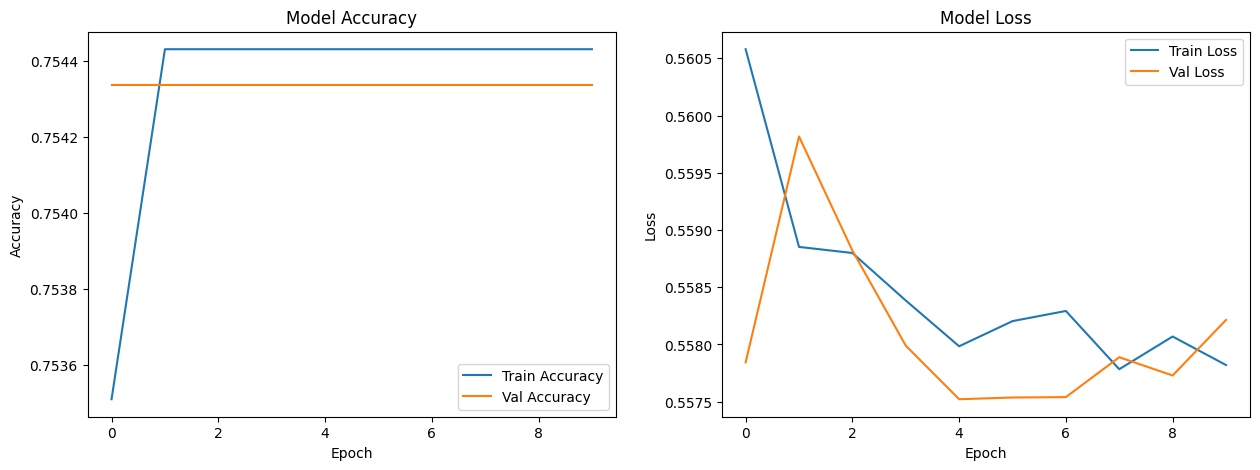

In [82]:
import matplotlib.pyplot as plt

# Create a figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Accuracy
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot Loss
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Val Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# Get probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary (0 or 1) using a 0.5 threshold
y_pred = (y_pred_probs > 0.5).astype("int32")

# Print the report
print("Classification Report:")
print(classification_report(y_test, y_pred))

145/145 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1133
           1       0.75      1.00      0.86      3479

    accuracy                           0.75      4612
   macro avg       0.38      0.50      0.43      4612
weighted avg       0.57      0.75      0.65      4612



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


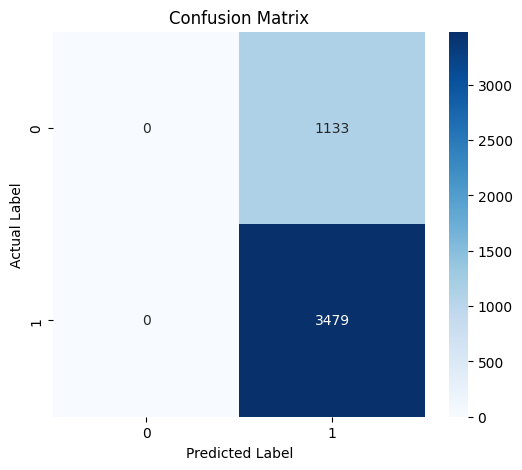

In [84]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()